# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [56]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here
data = pd.read_csv(DATA_FOLDER + '/ebola')

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

## Import libraries

In [6]:
from IPython.core.display import HTML
import pandas as pd
%pylab inline
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copyi2ng a slice from a DataFrame.
from itertools import cycle, islice


Populating the interactive namespace from numpy and matplotlib


## Read file

In [7]:
data = pd.read_excel('Data/titanic.xls')
data.head(10)# show the part of data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

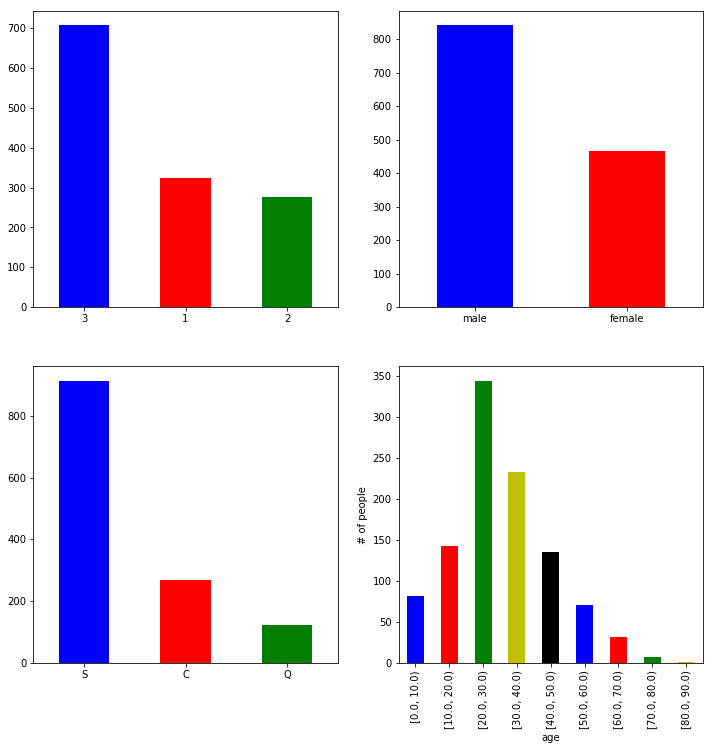

In [85]:
# function for showing the bar chart or histogram
def plot_fig(series, kind, axis, label_x = '', label_y = '', title_ = '', angle = 0):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(series)))
    series.plot(kind = kind, color = my_colors, ax = axis, figsize = (12,12), rot = angle)
    xlabel(label_x)
    ylabel(label_y)
    title(title_)

# create subplot to show the result together
fig, axes = plt.subplots(nrows=2, ncols=2)

# *****
# By definition, histogram is used when x-axis is a continuous variables
# and hence in our case, it's better using bar plot because most of the data are discrete values and strings 
# For age, I also use bar chart because the representation of intervals is string
# *****
    
# travel class v.s. # of people: travel class is discrete and hence use bar plot
plot_fig(data.pclass.value_counts(), kind = 'bar', label_x = 'travel class', label_y = '# of people', axis = axes[0,0])

# sex: string is not the case for in histogram, and hence use bar plot
plot_fig(data.sex.value_counts(), 'bar', label_x = 'sex', label_y = '# of people', axis = axes[0,1])

# embarkation port: string is not used as axis in histogram, and hence use bar chart
plot_fig(data.embarked.value_counts(), 'bar', label_x = 'embarkation port', label_y = '# of people',\
         title_ = 'embarkation port v.s. # of people', axis = axes[1,0])

# age (10 years as an interval)
data_age = data.age.copy()
bin_range = np.arange(0,data_age.max() + 20,10)
out, bins  = pd.cut(data.age, bins=bin_range, include_lowest=True, right=False, retbins=True)
plot_fig(out.value_counts(sort=False), 'bar', label_x = 'age', label_y = '# of people', axis = axes[1,1], angle = 90)

## 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

In [10]:
# plot function for pie charts
def plot_pie(series, label_x = '', label_y = '', title_ = ''):
    figure()
    axis('equal')
    series.plot.pie(autopct='%1.1f%%', figsize = (10,10))
    xlabel(label_x)
    ylabel(label_y)
    title(title_)

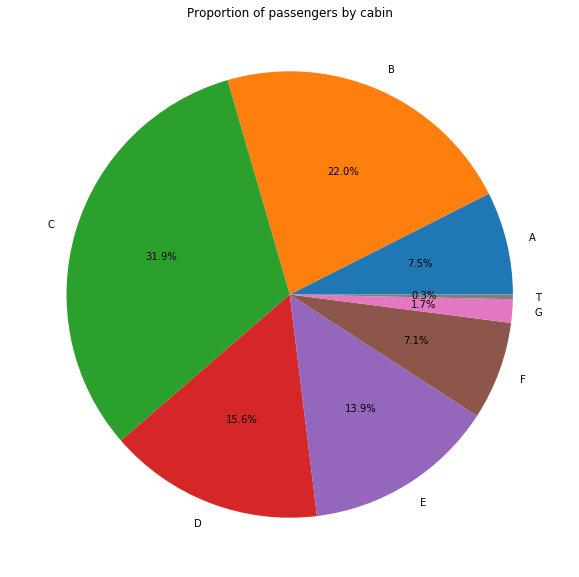

In [11]:
# Create the dataframe: cabin v.s. survive
survive_stat = pd.crosstab(data.cabin, data.survived)
# First letter -> floor
survive_stat = survive_stat.rename_axis(lambda x: x[0])
# group by cabin floor
survive_stat = survive_stat.groupby(survive_stat.index).sum()
# create a new column to store the total number of people in certain cabin
survive_stat['people'] = survive_stat[0] + survive_stat[1]

# plot the pie chart
plot_pie(survive_stat['people'], title_ = 'Proportion of passengers by cabin')


## 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

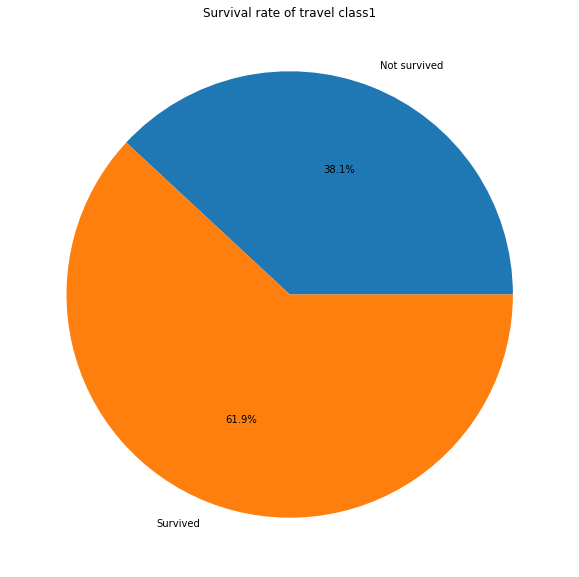

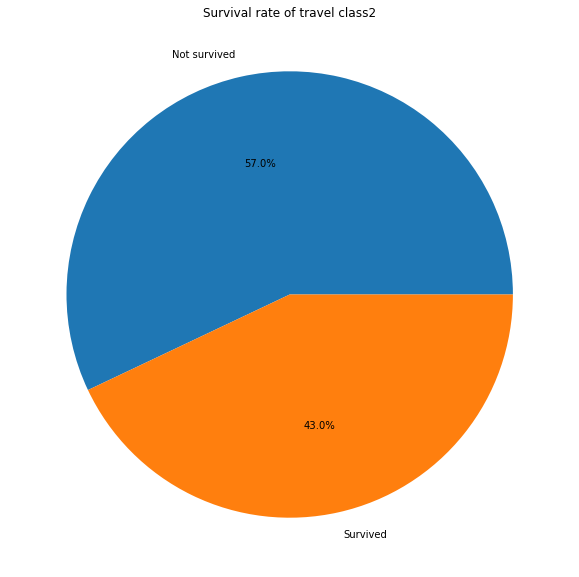

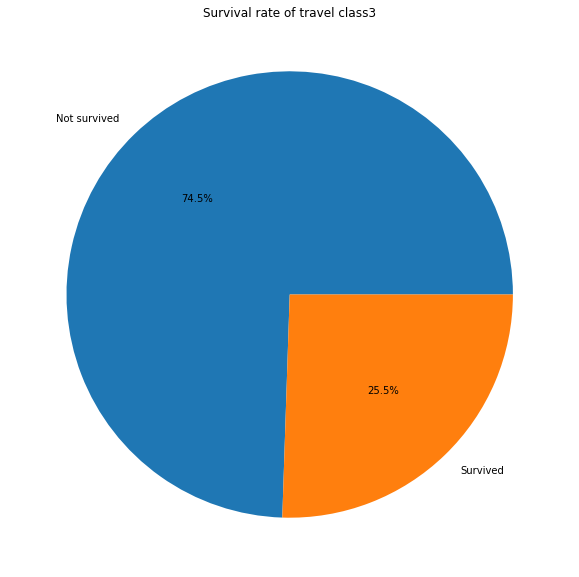

In [13]:
# generate the dataframe: survive v.s. class
survive_stat = pd.crosstab(data.survived, data.pclass)

# change the value of index
survive_stat = survive_stat.rename_axis({0: 'Not survived', 1: 'Survived'}) 

# for each travel class, plot the pie chart
for class_no in survive_stat.columns:
    plot_pie(survive_stat[class_no], title_ = 'Survival rate of travel class' + str(class_no))


## 5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

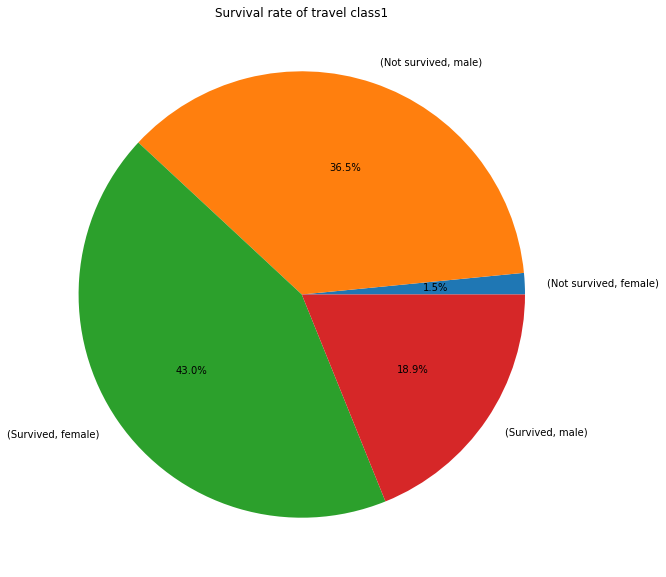

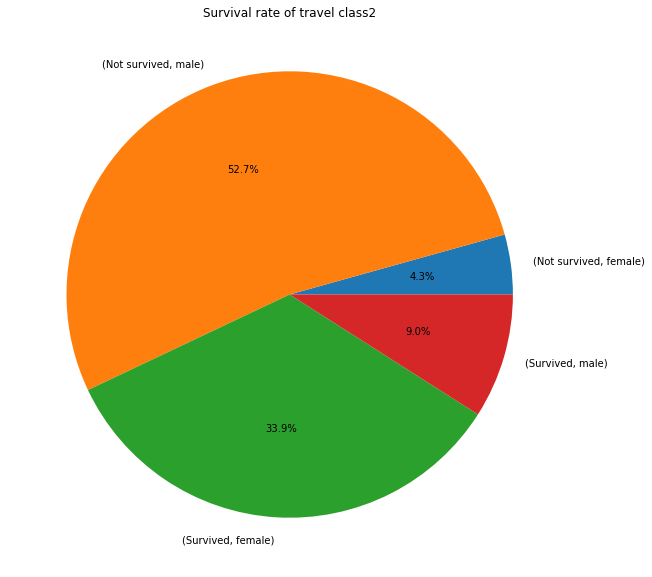

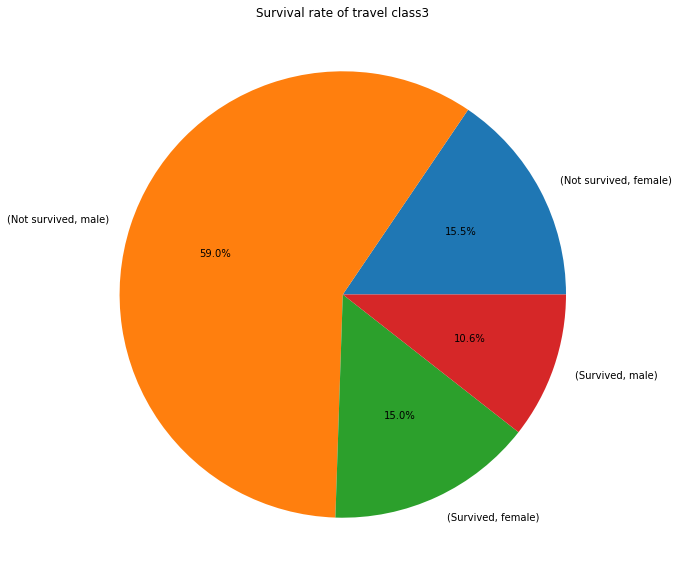

In [14]:
# generate the dataframe: (survive,sex) v.s. class
survive_stat = pd.crosstab([data.survived, data.sex], data.pclass)

# change the value of index
survive_stat = survive_stat.rename_axis({0: 'Not survived', 1: 'Survived'})

# for each travel class and sex, plot the pie chart
for class_no in survive_stat.columns:
    plot_pie(survive_stat[class_no], title_ = 'Survival rate of travel class' + str(class_no))

## 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

In [78]:
# discard the rows with NaN in age attributes
data_copy = data[['pclass', 'survived', 'sex', 'age']]
data_copy = data_copy[~data.age.isnull()]


# find the median of the age for the purpose of equally populated
med = np.median(data_copy.age)

# create age category
data_copy.age = ["< " + str(med) if age < 28 else ">= " + str(med) for age in data_copy.age]
data_copy['age'] = data_copy.age.astype('category')


# create the dataframe with index(age, pclass, sex)
stat = pd.crosstab([data_copy.age, data_copy.pclass, data_copy.sex], data_copy.survived)

# add the new column with survival rate
stat['survival rate (%)'] = [alive/(alive + dead)*100 for dead, alive in zip(stat[0], stat[1])]
stat

survived                 0   1  survival rate (%)
age     pclass sex                               
< 28.0  1      female    2  38          95.000000
               male     13  15          53.571429
        2      female    5  46          90.196078
               male     52  16          23.529412
        3      female   50  56          52.830189
               male    170  41          19.431280
>= 28.0 1      female    3  90          96.774194
               male     85  38          30.894309
        2      female    6  46          88.461538
               male     83   7           7.777778
        3      female   30  16          34.782609
               male    120  18          13.043478